# South Park network analysis
South park is an animated sitcom created by Trey Parker and Matt Stone. The Show debuted on August 13, 1997 and There has been produced 23 seasons and 2 special since. South Park is about the 4 friends Eric Cartman, Stan Marsh, Kyle Broflovski and Kenny McCormick. The show is characterized by having many odd and improbable characters that is both made up and parodies of celebreties and public figures. The show do often involve with controversy and taboo subjects. 

### Our inspiration
South park is a tv show that has existed as long as we can remember, we have therefore grown up with it. South park has a tendency to make shock value humor which speaks to a lot of young people. The fuck everything kind of mentality is excatly what we find fun and entertaining. The show has evolved through the years, we therefore thought it would be interesting to dig into how the characters interlink with each other and how the language has changed thorugh the seasons. 

### Goal for the project 
This notebook will give an introduction to the south park network. It will look at how characters interlink with each other and show stats from the network. There will be done commentary and explanations on the analysis. The analysis will be on basic stats, but will also dig into sentiment analysis of the main characters and how their language evolve through the seasons. There will be looked at the characters categories and see if they correspond to the communities that can be found from the GCC. 


# Basic stats 
The dataset is from southpark.fandom.com where we download all character pages and episode scripts. A character link to anoher character if the other character is mentioned in its character page. This way a digraph can be created for characters that interact with each other.
A csv file called "characters.csv" has been created. The csv has a column wit the character name and another column with a list containing the characters that the character link to. The directed network has been created and the gcc has been found. Both of them are saved in the github as a pickle file. We will look at the undirected gcc which is also saved in the github as a pickle file. 

In [33]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from math import log
from fa2 import ForceAtlas2

_ = sns.set

Loading in the undirected GCC.

In [2]:
G = nx.read_gpickle("SouthParkUnirectedGCC.gpickle")

 We will start with showing some stats on the network. Here are number of nodes, edges and a list of the 5 most connected characters.

In [29]:
def printBasicStats(G):
    print("Basic stats for the gcc network:")
    N = len(G.nodes())
    K = sum(dict(G.degree()).values())/N
    d = log(N)/log(K)
    print("Number of nodes: ", N)
    print("Number of edges: ", len(G.edges()))
    print("Avergae degree: ", K)
    print("Avergae distance between 2 nodes: ", d)
    print("\n5 most connected characters: " )
    degree_list = sorted(G.degree, key=lambda x: x[1], reverse=True)
    for node, degree in degree_list[0:5]:
        print(f'{node}: {degree} edges')
printBasicStats(G)

Basic stats for the gcc network:
Number of nodes:  1708
Number of edges:  6788
Avergae degree:  7.948477751756441
Avergae distance between 2 nodes:  3.5905203239843737

5 most connected characters: 
Eric Cartman: 568 edges
Stan Marsh: 382 edges
Kyle Broflovski: 325 edges
Butters Stotch: 265 edges
Randy Marsh: 257 edges


When looking at the 5 most connected characters then it is interesting that Kenny McCormick is not one of them, since he is one of the 4 main characters of the show. An explanation to this could be that he never really talks in the show, but he more mumbles through everything and it can therefore be hard to understand the character. Butters and Randy do make sense that they are highly conncted since they are a big part of the show. 

We want to show the degree distribution of the network.

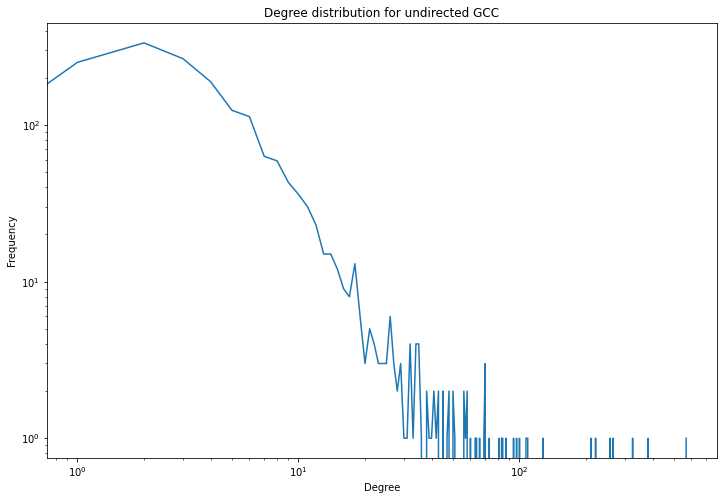

In [7]:
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
_ = plt.figure(figsize=(12, 8)) 
_ =plt.loglog(degrees, degree_freq,'-') 
_= plt.xlabel('Degree')
_= plt.ylabel('Frequency')
_ = plt.title("Degree distribution for undirected GCC")

The degree distrbibution tells us that the network is not random. This is expected since we have some characters that are in every episode of the show and a lot of characters that only show in a single episode or a few. This gives a very uneven distribution through the network. 

Now we can plot the network using forceatlas2.

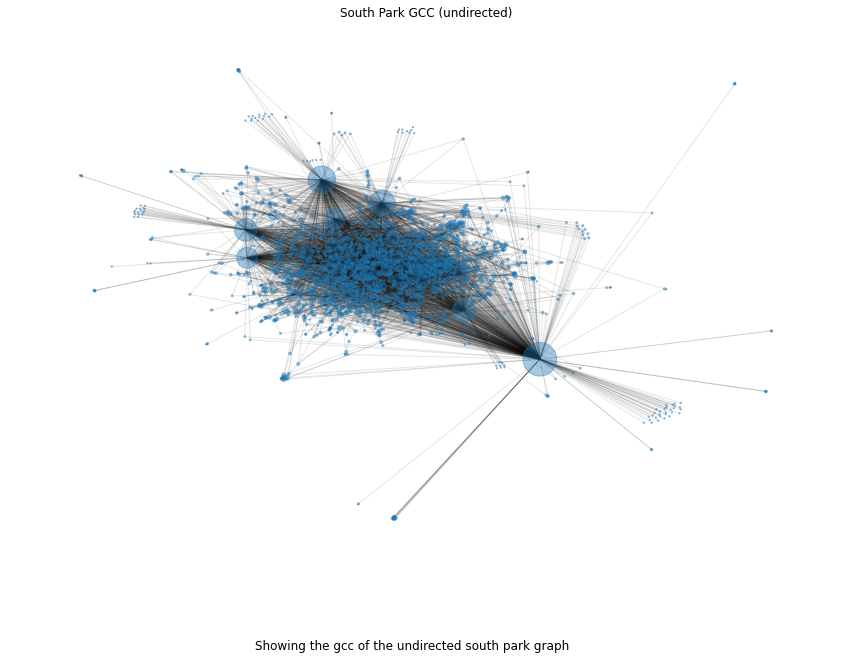

In [36]:
# set node size depending on degree
node_sizes = [2*v for v in dict(G.degree).values()]
# Setup FA2 w. parameters
forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True,    # Dissuade hubs
    edgeWeightInfluence=1.0,

    # Performance
    jitterTolerance=1.0,  # Tolerance
    barnesHutOptimize=True,
    barnesHutTheta=1.2,

    # Tuning
    scalingRatio=2.0,
    strongGravityMode=True,
    gravity=1.0,

    # Log
    verbose=False
)

# compute node positions with the fa algorithm
node_pos = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)
# Plotting the network
plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, node_pos, node_size=node_sizes, alpha=0.4)
nx.draw_networkx_edges(G, node_pos, alpha=0.1)
plt.title('South Park GCC (undirected)')
plt.axis('off')
fig_text = """Showing the gcc of the undirected south park graph"""
plt.figtext(
    0.5, 0.01, wrap=True, horizontalalignment='center', fontsize=12, s=fig_text
)
plt.savefig("Graph.png", format="PNG")
plt.show()

From this it is clear to see that there are a handfull of hubs that almost all other nodes connect to. This is also what we saw when looking at the degree distribution plot, that there were a few characters that had a lot of nodes connected to them. There are also a lot of nodes with only a few edges, whoch is expected since some characters are only part of 1 or a few episodes. 